In [40]:
#Importing Packages
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [41]:
#open data 
FTSE100 = pd.read_csv('/content/drive/MyDrive/Stock Data/FTSE100_R.csv')
FTSE100 = FTSE100.set_index(pd.DatetimeIndex(FTSE100['Date'].values))
FTSE100

,Date,Open Price,Close Price,High Price,Low Price,Volume
2009-01-02,02-Jan-09,4434.20,4561.80,4561.80,4430.00,407295392
2009-01-05,05-Jan-09,4561.80,4579.60,4618.10,4520.80,836675968
2009-01-06,06-Jan-09,4579.60,4638.90,4675.70,4562.00,1037315904
2009-01-07,07-Jan-09,4638.90,4507.50,4638.90,4478.00,1060111232
2009-01-08,08-Jan-09,4507.50,4505.40,4514.70,4410.50,924352384
...,...,...,...,...,...,...
2021-10-25,25-Oct-21,7204.55,7222.82,7247.53,7204.55,589120128
2021-10-26,26-Oct-21,7222.82,7277.62,7281.17,7222.82,670406912
2021-10-27,27-Oct-21,7277.62,7253.27,7280.45,7247.25,606503744
2021-10-28,28-Oct-21,7253.27,7249.47,7257.85,7219.71,676321664


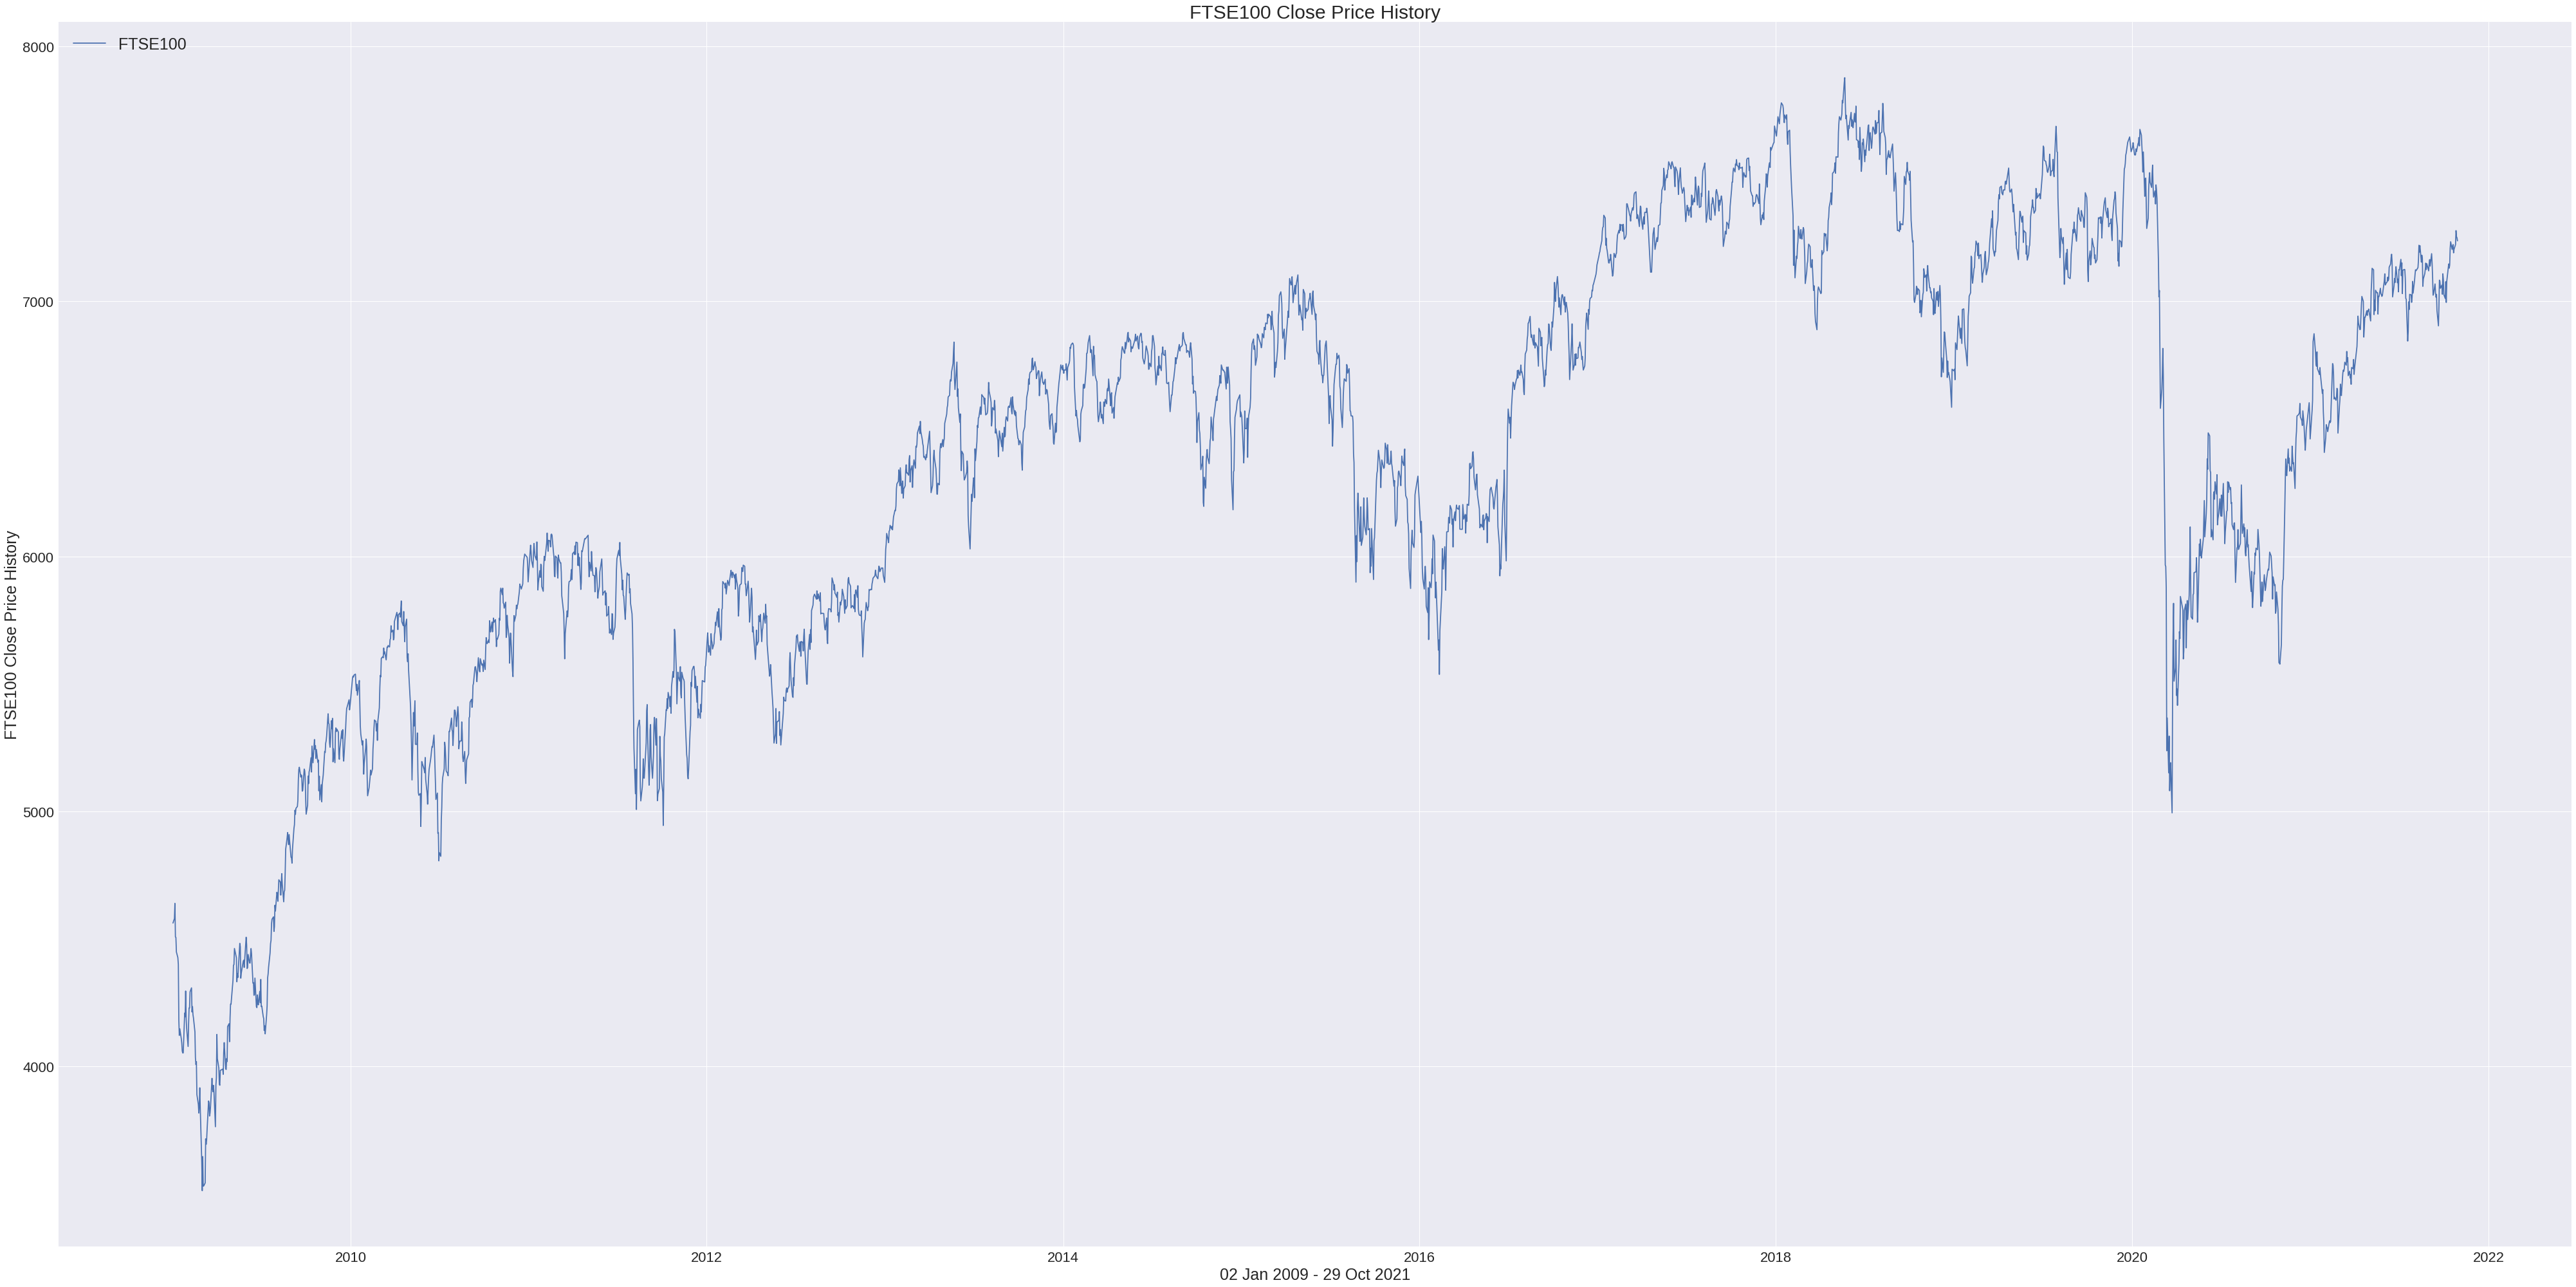

In [42]:
#plot data
plt.figure(figsize = (70, 35))
plt.plot(FTSE100['Close Price'], label = 'FTSE100')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.title('FTSE100 Close Price History', fontsize = 30)
plt.xlabel('02 Jan 2009 - 29 Oct 2021', fontsize = 25)
plt.ylabel('FTSE100 Close Price History', fontsize = 25)
plt.legend(loc = 'upper left', fontsize = 25)
plt.show()

In [43]:
#Three Moving Averages Calculation
emashort = FTSE100['Close Price'].ewm(span=5, adjust = False).mean()
emamiddle = FTSE100['Close Price'].ewm(span=22, adjust = False).mean()
emalong = FTSE100['Close Price'].ewm(span=64, adjust = False).mean()

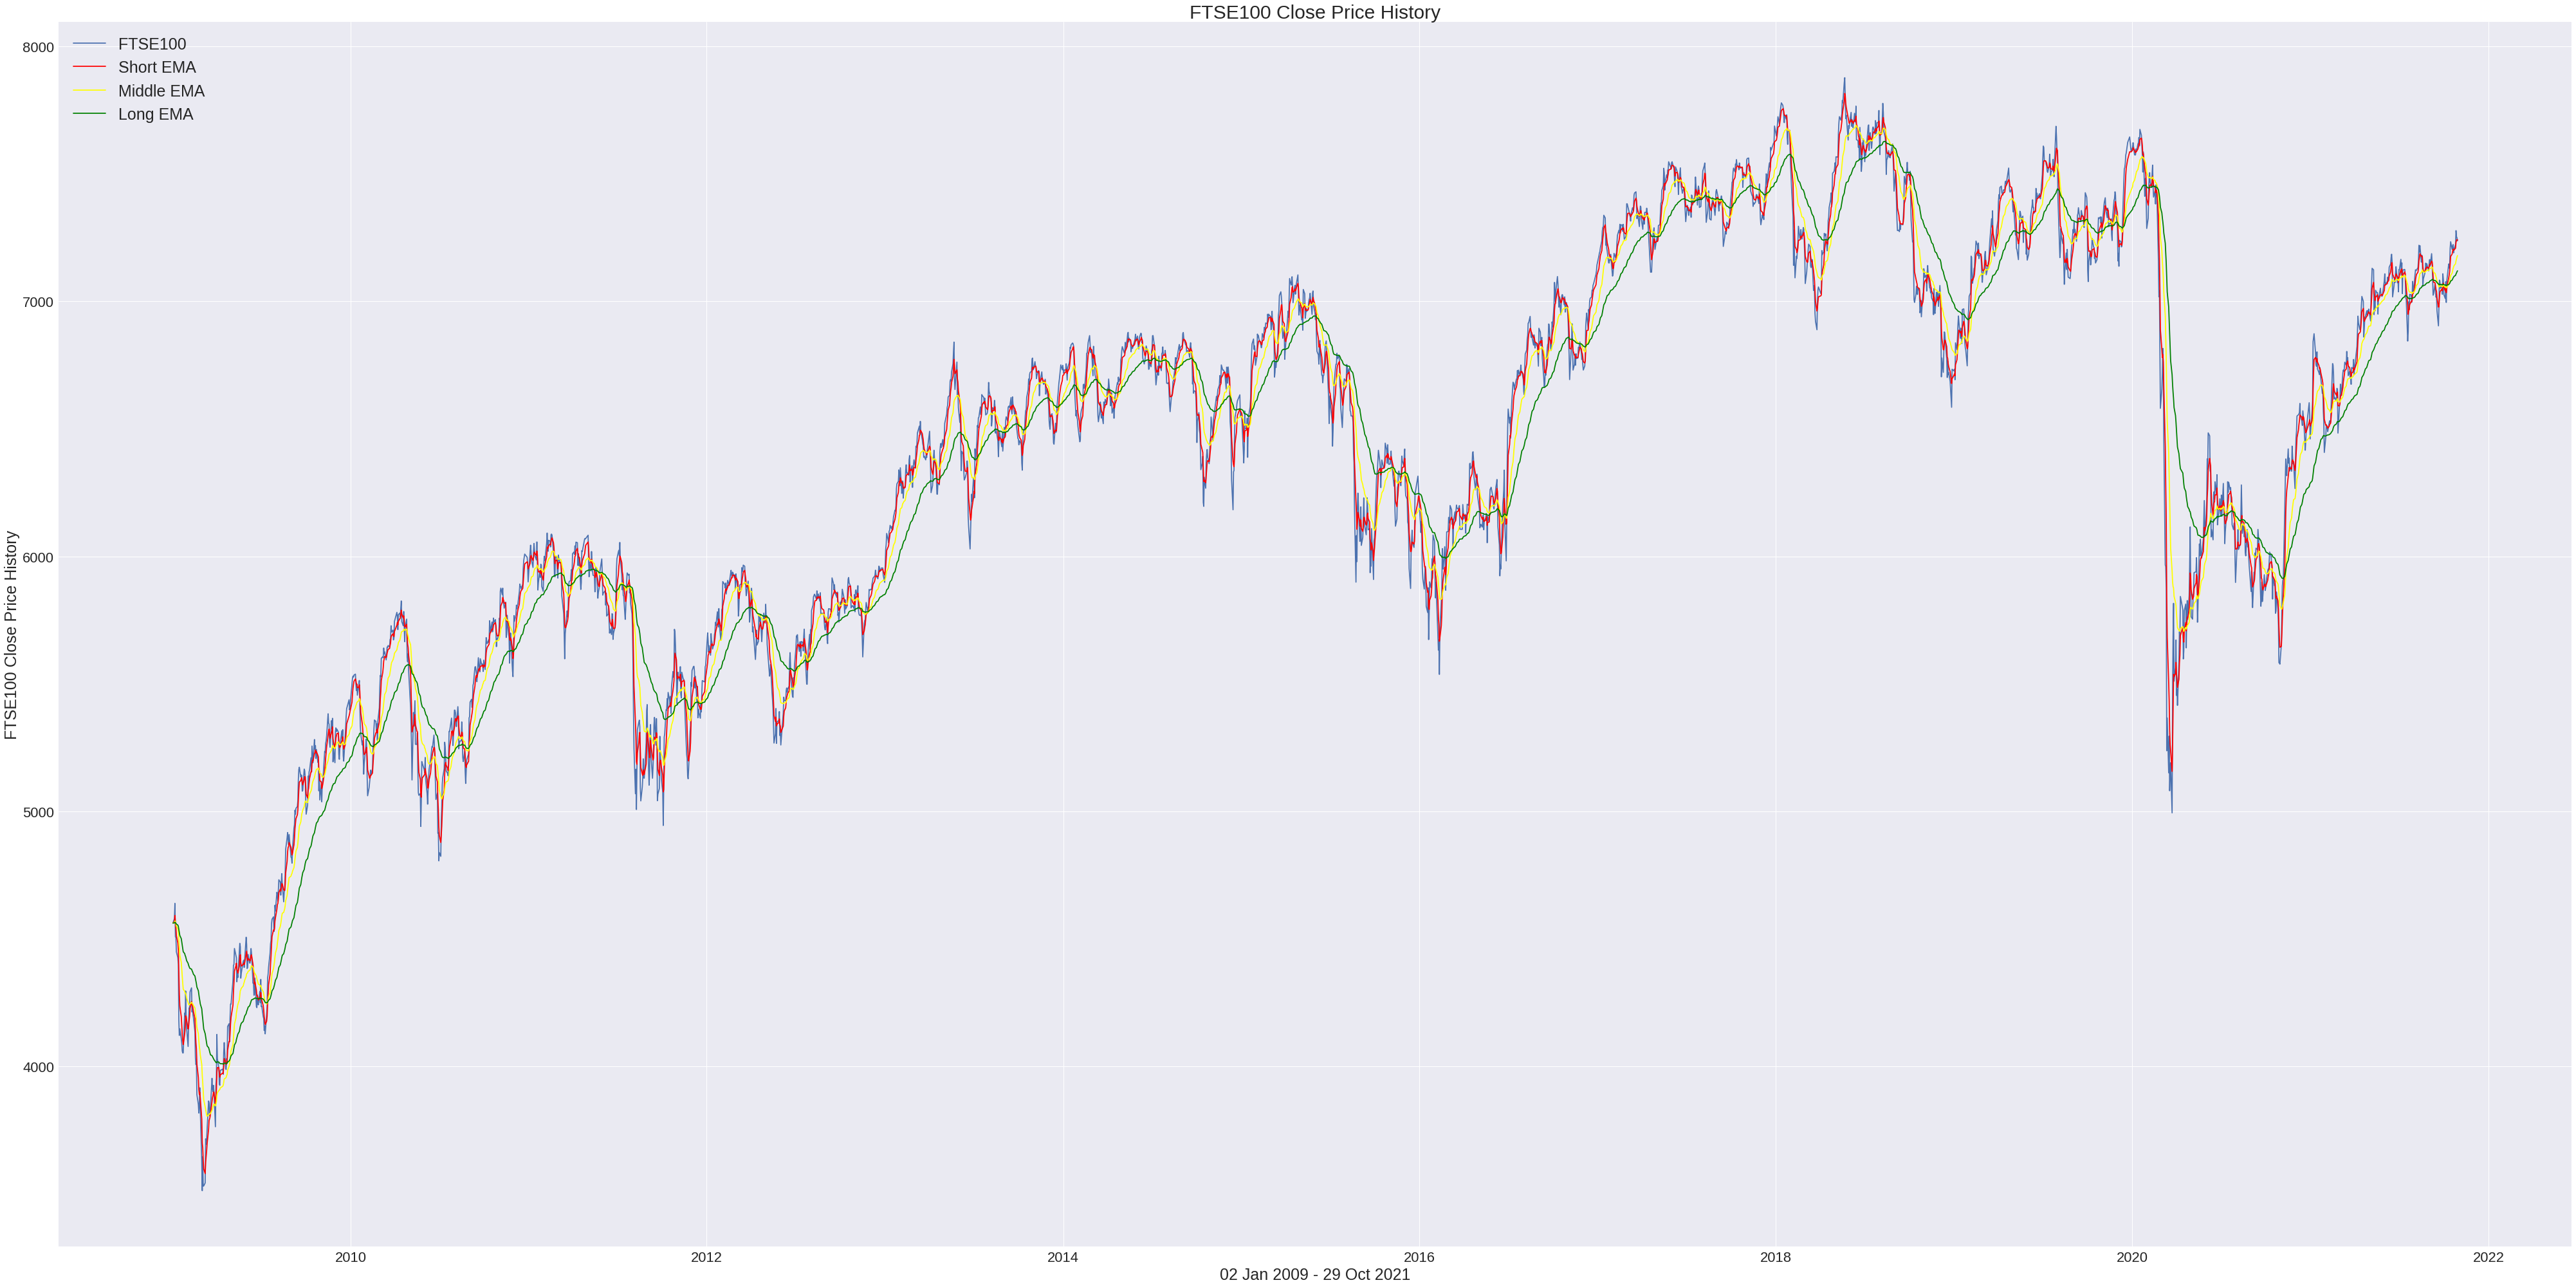

In [44]:
#Plotting the Three Moving Averages
plt.figure(figsize = (70, 35))
plt.plot(FTSE100['Close Price'], label = 'FTSE100')
plt.plot(emashort, label='Short EMA', color = 'red')
plt.plot(emamiddle, label='Middle EMA', color = 'yellow')
plt.plot(emalong, label = 'Long EMA', color = 'green')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.title('FTSE100 Close Price History', fontsize = 30)
plt.xlabel('02 Jan 2009 - 29 Oct 2021', fontsize = 25)
plt.ylabel('FTSE100 Close Price History', fontsize = 25)
plt.legend(loc = 'upper left', fontsize = 25)
plt.show()

In [45]:
#Adding the Moving Averages to the DataFrame
FTSE100['Short EMA'] = emashort
FTSE100['Middle EMA'] = emamiddle
FTSE100['Long EMA'] = emalong
FTSE100

,Date,Open Price,Close Price,High Price,Low Price,Volume,Short EMA,Middle EMA,Long EMA
2009-01-02,02-Jan-09,4434.20,4561.80,4561.80,4430.00,407295392,4561.800000,4561.800000,4561.800000
2009-01-05,05-Jan-09,4561.80,4579.60,4618.10,4520.80,836675968,4567.733333,4563.347826,4562.347692
2009-01-06,06-Jan-09,4579.60,4638.90,4675.70,4562.00,1037315904,4591.455556,4569.917580,4564.703148
2009-01-07,07-Jan-09,4638.90,4507.50,4638.90,4478.00,1060111232,4563.470370,4564.489965,4562.943051
2009-01-08,08-Jan-09,4507.50,4505.40,4514.70,4410.50,924352384,4544.113580,4559.351707,4561.172496
...,...,...,...,...,...,...,...,...,...
2021-10-25,25-Oct-21,7204.55,7222.82,7247.53,7204.55,589120128,7208.693893,7147.504113,7102.002847
2021-10-26,26-Oct-21,7222.82,7277.62,7281.17,7222.82,670406912,7231.669262,7158.818538,7107.406452
2021-10-27,27-Oct-21,7277.62,7253.27,7280.45,7247.25,606503744,7238.869508,7167.031709,7111.894561
2021-10-28,28-Oct-21,7253.27,7249.47,7257.85,7219.71,676321664,7242.403005,7174.200256,7116.127652


In [46]:
#Buy/Sell Signal Function
def Signal(inp):
  sigbuy = []
  sigsell = []
  f_long = -1
  f_short = -1

  for i in range(len(inp)):
    if inp['Middle EMA'][i] < inp['Long EMA'][i] and inp['Short EMA'][i] < inp['Middle EMA'][i]:
      if f_long != 1 and f_short != 1:
        sigbuy.append(inp['Close Price'][i])
        sigsell.append(np.nan)
        f_short = 1 
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    elif inp['Short EMA'][i] > inp['Middle EMA'][i]:
      if f_short != 0:
        sigbuy.append(np.nan)
        sigsell.append(inp['Close Price'][i])
        f_short = 0
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    elif inp['Middle EMA'][i] > inp['Long EMA'][i] and inp['Short EMA'][i] > inp['Middle EMA'][i]:
      if f_long != 1 and f_short != 1:
        sigbuy.append(inp['Close Price'][i])
        sigsell.append(np.nan)
        f_long = 1 
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    elif inp['Short EMA'][i] < inp['Middle EMA'][i]:
      if f_long != 0:
        sigbuy.append(np.nan)
        sigsell.append(inp['Close Price'][i])
        f_long = 0
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    else:
      sigbuy.append(np.nan)
      sigsell.append(np.nan)
  
  return(sigbuy, sigsell)

In [47]:
#Adding Signals to DataFrame
s = Signal(FTSE100)
FTSE100['Buy Signal'] = s[0]
FTSE100['Sell Signal'] = s[1]
FTSE100

,Date,Open Price,Close Price,High Price,Low Price,Volume,Short EMA,Middle EMA,Long EMA,Buy Signal,Sell Signal
2009-01-02,02-Jan-09,4434.20,4561.80,4561.80,4430.00,407295392,4561.800000,4561.800000,4561.800000,NaN,NaN
2009-01-05,05-Jan-09,4561.80,4579.60,4618.10,4520.80,836675968,4567.733333,4563.347826,4562.347692,NaN,4579.6
2009-01-06,06-Jan-09,4579.60,4638.90,4675.70,4562.00,1037315904,4591.455556,4569.917580,4564.703148,NaN,NaN
2009-01-07,07-Jan-09,4638.90,4507.50,4638.90,4478.00,1060111232,4563.470370,4564.489965,4562.943051,NaN,4507.5
2009-01-08,08-Jan-09,4507.50,4505.40,4514.70,4410.50,924352384,4544.113580,4559.351707,4561.172496,4505.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,25-Oct-21,7204.55,7222.82,7247.53,7204.55,589120128,7208.693893,7147.504113,7102.002847,NaN,NaN
2021-10-26,26-Oct-21,7222.82,7277.62,7281.17,7222.82,670406912,7231.669262,7158.818538,7107.406452,NaN,NaN
2021-10-27,27-Oct-21,7277.62,7253.27,7280.45,7247.25,606503744,7238.869508,7167.031709,7111.894561,NaN,NaN
2021-10-28,28-Oct-21,7253.27,7249.47,7257.85,7219.71,676321664,7242.403005,7174.200256,7116.127652,NaN,NaN


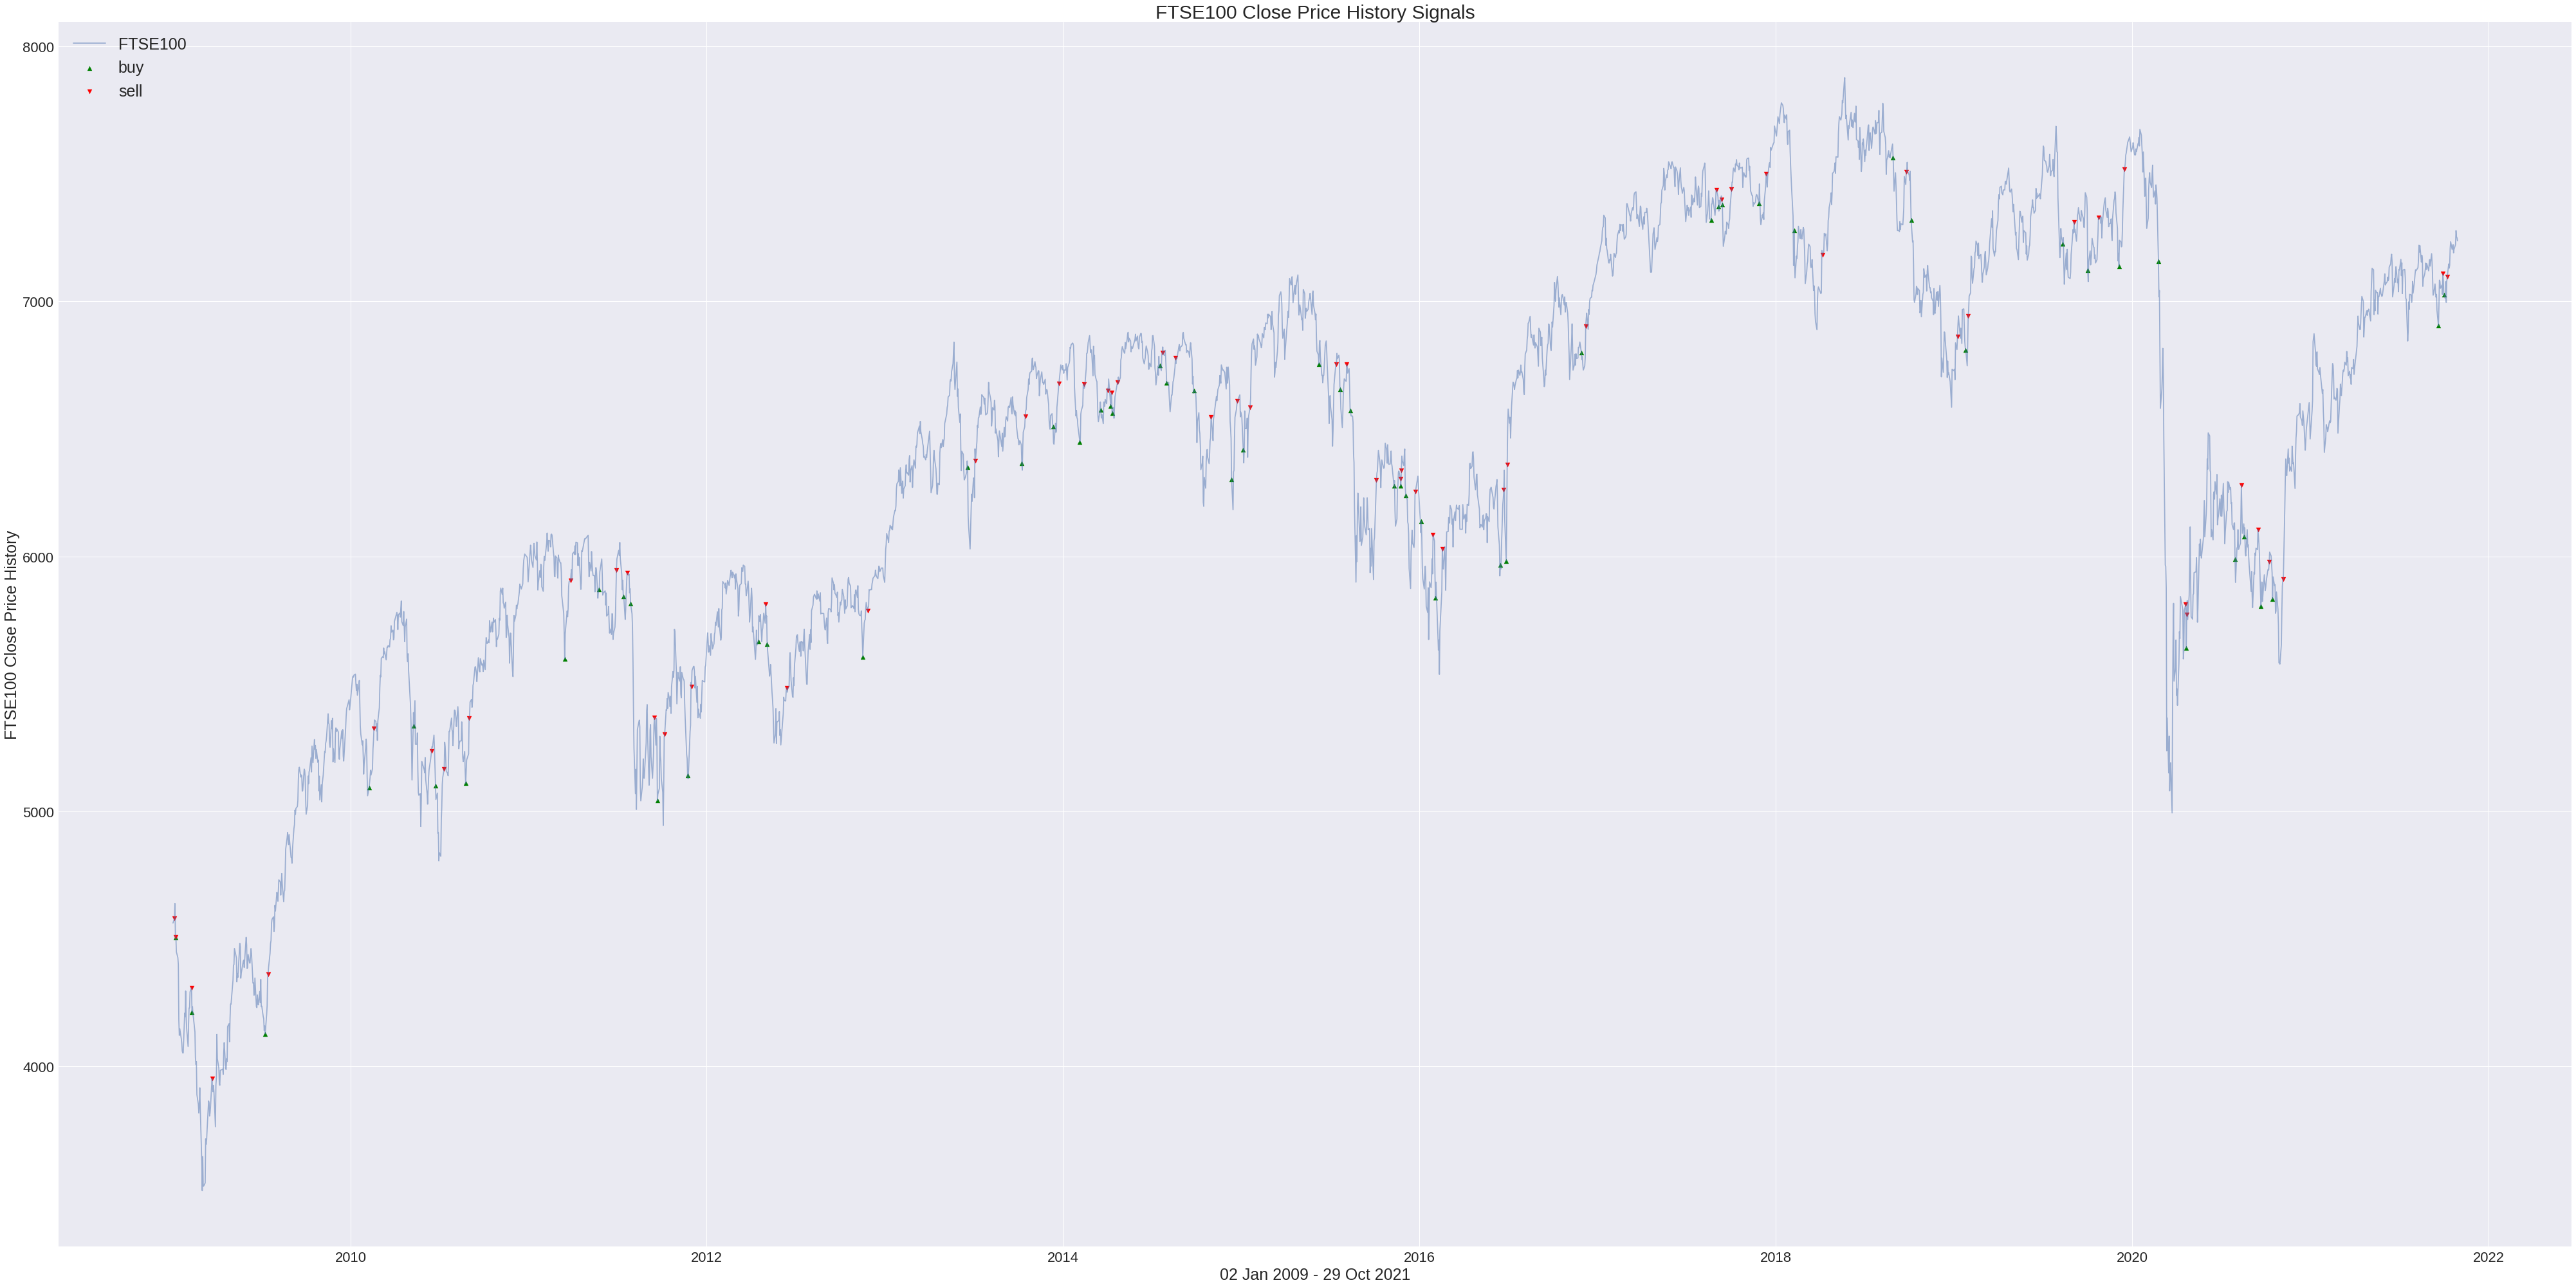

In [48]:
#Plotting Buy/Sell Signals
plt.figure(figsize = (70, 35))
plt.plot(FTSE100['Close Price'], label = 'FTSE100', alpha = 0.5)
plt.scatter(FTSE100.index, FTSE100['Buy Signal'], label = 'buy', marker = '^', color = 'green')
plt.scatter(FTSE100.index, FTSE100['Sell Signal'], label = 'sell', marker = 'v', color = 'red')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.title('FTSE100 Close Price History Signals', fontsize = 30)
plt.xlabel('02 Jan 2009 - 29 Oct 2021', fontsize = 25)
plt.ylabel('FTSE100 Close Price History', fontsize = 25)
plt.legend(loc = 'upper left', fontsize = 25)
plt.show()